# Data Science for Novel Coronovirus

11810206 孙涛 (Self Work)


## 1. Background introduction:
2019 Novel Coronavirus (COVID-19) has infected more than 1 million people in the
world.We want to do something against this pestilence by using what we have learnt.
This datasets consists of 11 CSV files from the KCDC (Korea Centers for Disease Control & Prevention), a structured
dataset based on the report materials of KCDC and local governments was provided by Korean researchers.
## 2. Data Analysis
### 2.1 Data Statistics and Visualization
#### 2.1.1 Data Preprocessing 

In [1]:
# needed imports
import pandas as pd
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn import manifold
import numpy as np
from sklearn.linear_model import LassoLarsCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge,RidgeCV  
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial import distance
from sklearn.cluster import KMeans  
from sklearn import manifold
from sklearn.decomposition import PCA

In [3]:
PatientInfo = pd.read_csv('PatientInfo.csv')
PatientInfo.head(5)

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,2.0,male,1964.0,50s,Korea,Seoul,Gangseo-gu,NaN,overseas inflow,1.0,NaN,75.0,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,5.0,male,1987.0,30s,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,1.0,NaN,31.0,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,6.0,male,1964.0,50s,Korea,Seoul,Jongno-gu,NaN,contact with patient,2.0,2.002000e+09,17.0,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,7.0,male,1991.0,20s,Korea,Seoul,Mapo-gu,NaN,overseas inflow,1.0,NaN,9.0,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,9.0,female,1992.0,20s,Korea,Seoul,Seongbuk-gu,NaN,contact with patient,2.0,1.000000e+09,2.0,NaN,2020-01-31,2020-02-24,NaN,released


1. Using the method duplicated in Pandas to detect duplicate values in the dataset

In [143]:
PatientInfo[PatientInfo.duplicated()] 

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state


The result shows there is no duplicate values.
2. See if there are missing values for each attribute of the data set

In [144]:
index_array = np.sum(PatientInfo.isnull() == True, axis=0)
print(index_array)
print(PatientInfo.shape[0])

patient_id               0
global_num            1160
sex                     94
birth_year             464
age                    105
country                 90
province                 0
city                    76
disease               3110
infection_case         819
infection_order       3097
infected_by           2393
contact_number        2539
symptom_onset_date    2682
confirmed_date           0
released_date         2147
deceased_date         3072
state                    0
dtype: int64
3128


There are 3128 rows in the dataset PatientInfo.csv
I notice that there are many miss values in many colums, and I decide first observe characteristics of the data by visualization and then deal with the miss value.

3. Outlier detecting

In [145]:
PatientInfo.describe().astype(np.int64).T

,count,mean,std,min,25%,50%,75%,max
patient_id,3128,3562811488,2210168227,1000000001,1300000026,2000000576,6001000519,7000000009
global_num,1968,6234,3297,1,3624,7437,9085,10329
birth_year,2664,1974,20,1916,1960,1974,1993,2020
infection_order,31,2,1,1,1,2,3,6
infected_by,735,2557285853,1645930848,1000000002,1200000031,2000000205,4100000006,6100000384
contact_number,589,18,76,0,2,4,14,1160


The results show that there is no outliers
#### 2.1.2 Visualization of PatientInfo
1. Gender distribution

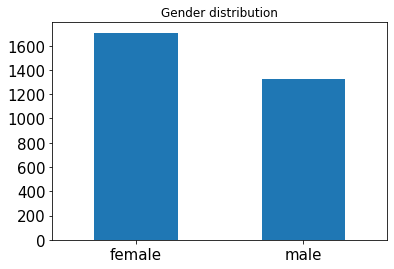

In [146]:
PatientInfo['sex'].value_counts().plot(kind='bar',title='Gender distribution',fontsize=15, rot=360)

2. Age distribution

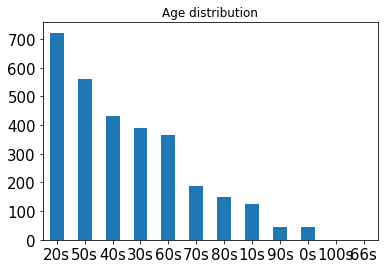

In [147]:
PatientInfo['age'].value_counts().plot(kind='bar',title='Age distribution',fontsize=15, rot=360)

3. Top ten cities with the most patients

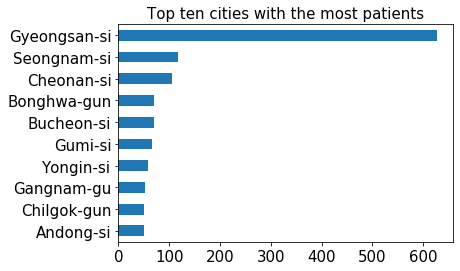

In [148]:
city=PatientInfo['city'].value_counts()
city= city.sort_values(ascending=False)[:10]
city.sort_values(ascending=True).plot.barh(fontsize=15)
plt.title('Top ten cities with the most patients',size=15)
plt.show()

4. Top ten province with the most patients

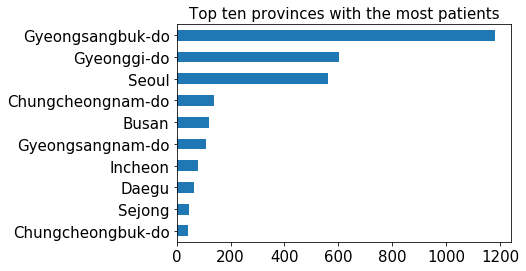

In [149]:
province=PatientInfo['province'].value_counts()
province= province.sort_values(ascending=False)[:10]
province.sort_values(ascending=True).plot.barh(fontsize=15)
plt.title('Top ten provinces with the most patients',size=15)
plt.show()

5. Top ten infection_case of patients

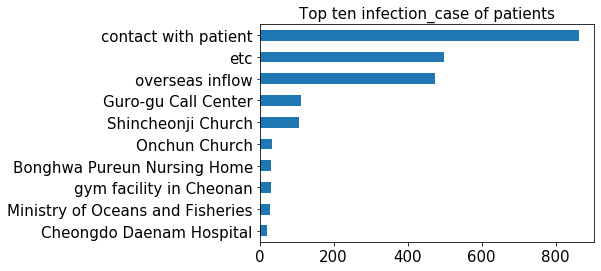

In [150]:
infection_case=PatientInfo['infection_case'].value_counts()
infection_case= infection_case.sort_values(ascending=False)[:10]
infection_case.sort_values(ascending=True).plot.barh(fontsize=15)
plt.title('Top ten infection_case of patients',size=15)
plt.show()

6. The relation between sex and state among patients.

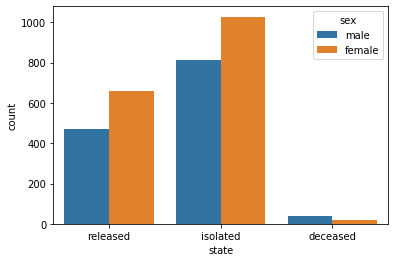

In [151]:
sns.countplot(x="state", hue="sex", data=PatientInfo)

7. The relation between age and state among patients.

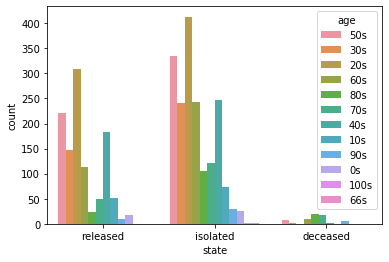

In [152]:
sns.countplot(x="state", hue="age", data=PatientInfo)

8. The relation between the top five cities with most patients and state among patients.

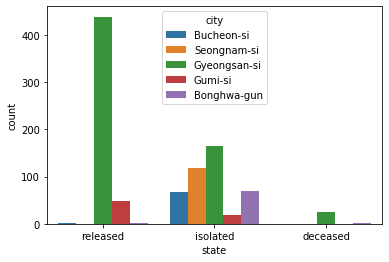

In [153]:
top_five_cities=PatientInfo[PatientInfo['city'].isin(['Gyeongsan-si','Seongnam-si','Bonghwa-gun','Bucheon-si','Gumi-si'])]
sns.countplot(x="state", hue="city", data=top_five_cities)

9. The relation between the top five provinces with most patients and state among patients.

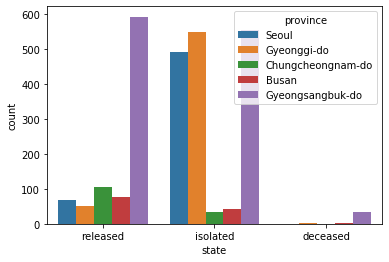

In [154]:
top_five_provinces=PatientInfo[PatientInfo['province'].isin(['Gyeongsangbuk-do','Gyeonggi-do','Seoul','Chungcheongnam-do','Busan'])]
sns.countplot(x="state", hue="province", data=top_five_provinces)

10. The relation between the top five infection_case with most patients and state among patients.

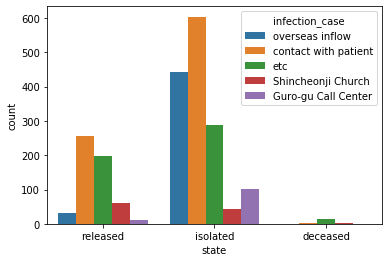

In [155]:
top_five_infection_case=PatientInfo[PatientInfo['infection_case'].
                                    isin(['contact with patient','etc','overseas inflow','Guro-gu Call Center','Shincheonji Church'])]
sns.countplot(x="state", hue="infection_case", data=top_five_infection_case)

**Conclusion:**

After preliminary data visualization analysis, we can find that the number of female patients is about 300 larger than the number of male patients, most patients are aged from 20 to 60, most patients are form the city Gyeongsan-si, most patients are form the provinces  Gyeongsangbuk-do, Gyeonggi-do and Seoul and most infection cases are contact with patient, etc and overseas inflow.

By analysing the states of patients(isolated / released / deceased) and other attributes, we can find that male patients may be a little easier to be deceased than female patients because the number of female patients is larger than the number of male patients but the number of  deceased female patients is less than the number of deceased male patients.

We can also find that younger patients may be easier to be released than older patients and older patients may be easier to be deceased than older patients.

We can also find that contacting with patients around you in your city and province is the main reason people get infected.
#### 2.1.3 Visualize the Time Series Data 
1. Visualize the File Time

In [156]:
Time = pd.read_csv('Time.csv')
Time.head(5)

,date,time,test,negative,confirmed,released,deceased
0,2020-01-20,16,1,0,1,0,0
1,2020-01-21,16,1,0,1,0,0
2,2020-01-22,16,4,3,1,0,0
3,2020-01-23,16,22,21,1,0,0
4,2020-01-24,16,27,25,2,0,0


In [157]:
#We do not care the update time so we drop it.
Time.drop(['time'],axis=1,inplace=True)
Time.set_index('date',inplace=True)
Time.head(5)

,test,negative,confirmed,released,deceased
date,,,,,
2020-01-20,1,0,1,0,0
2020-01-21,1,0,1,0,0
2020-01-22,4,3,1,0,0
2020-01-23,22,21,1,0,0
2020-01-24,27,25,2,0,0


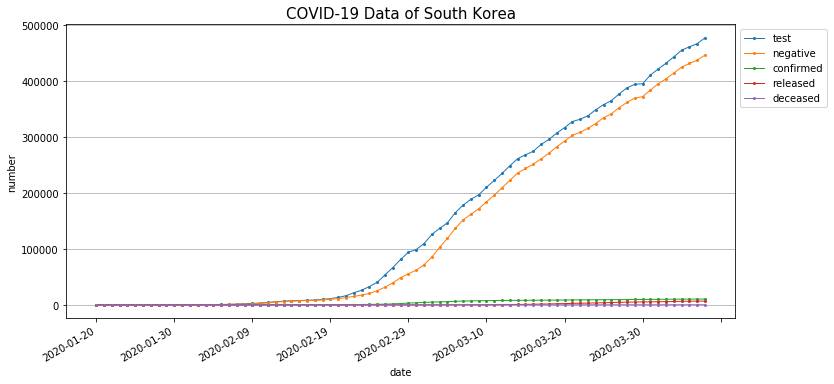

In [158]:
fig, ax = plt.subplots(figsize=(12,6))
Time.plot(marker='o',ms=2,lw=1,ax=ax)
fig.autofmt_xdate()
plt.legend(bbox_to_anchor = [1,1])
plt.title('COVID-19 Data of South Korea',size=15)
plt.ylabel('number')
plt.grid(axis='y')
plt.show()

The figure is not very clear because the accumulated test and negative number is much larger that the rest numbers.
Hence we will just focus on the number of confirmed, released and deceased patients.

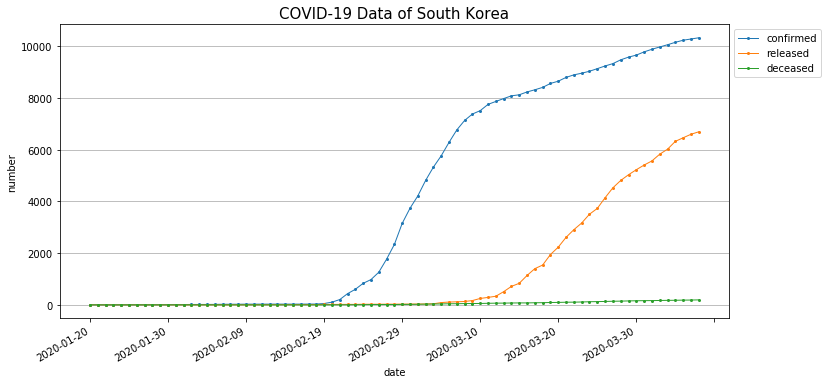

In [159]:
Time.drop(['test','negative'],axis=1,inplace=True)
fig, ax = plt.subplots(figsize=(12,6))
Time.plot(marker='o',ms=2,lw=1,ax=ax)
fig.autofmt_xdate()
plt.legend(bbox_to_anchor = [1,1])
plt.title('COVID-19 Data of South Korea',size=15)
plt.ylabel('number')
plt.grid(axis='y')
plt.show()

2. Visualize the File TimeAge

In [4]:
TimeAge = pd.read_csv('TimeAge.csv')
TimeAge.head(5)

,date,time,age,confirmed,deceased
0,2020-03-02,0,0s,32,0
1,2020-03-02,0,10s,169,0
2,2020-03-02,0,20s,1235,0
3,2020-03-02,0,30s,506,1
4,2020-03-02,0,40s,633,1


In [5]:
#We do not care the update time so we drop it.
TimeAge.drop(['time'],axis=1,inplace=True)
TimeAge.head(5)

,date,age,confirmed,deceased
0,2020-03-02,0s,32,0
1,2020-03-02,10s,169,0
2,2020-03-02,20s,1235,0
3,2020-03-02,30s,506,1
4,2020-03-02,40s,633,1


In [6]:
#processing of Dataframe TimeAge to make it easy to draw clear figures.
Age0=TimeAge[TimeAge['age']=='0s']
Age0=Age0.rename(columns={'confirmed':'confirmed_0s'})
Age0=Age0.rename(columns={'deceased':'deceased_0s'})
Age1=TimeAge[TimeAge['age']=='10s']
Age1=Age1.rename(columns={'confirmed':'confirmed_10s'})
Age1=Age1.rename(columns={'deceased':'deceased_10s'})
Age2=TimeAge[TimeAge['age']=='20s']
Age2=Age2.rename(columns={'confirmed':'confirmed_20s'})
Age2=Age2.rename(columns={'deceased':'deceased_20s'})
Age3=TimeAge[TimeAge['age']=='30s']
Age3=Age3.rename(columns={'confirmed':'confirmed_30s'})
Age3=Age3.rename(columns={'deceased':'deceased_30s'})
Age4=TimeAge[TimeAge['age']=='40s']
Age4=Age4.rename(columns={'confirmed':'confirmed_40s'})
Age4=Age4.rename(columns={'deceased':'deceased_40s'})
Age5=TimeAge[TimeAge['age']=='50s']
Age5=Age5.rename(columns={'confirmed':'confirmed_50s'})
Age5=Age5.rename(columns={'deceased':'deceased_50s'})
Age6=TimeAge[TimeAge['age']=='60s']
Age6=Age6.rename(columns={'confirmed':'confirmed_60s'})
Age6=Age6.rename(columns={'deceased':'deceased_60s'})
Age7=TimeAge[TimeAge['age']=='70s']
Age7=Age7.rename(columns={'confirmed':'confirmed_70s'})
Age7=Age7.rename(columns={'deceased':'deceased_70s'})
Age8=TimeAge[TimeAge['age']=='80s']
Age8=Age8.rename(columns={'confirmed':'confirmed_80s'})
Age8=Age8.rename(columns={'deceased':'deceased_80s'})

result = pd.merge(Age0, Age1, on='date')
result=pd.merge(result, Age2, on='date')
result=pd.merge(result, Age3, on='date')
result=pd.merge(result, Age4, on='date')
result=pd.merge(result, Age5, on='date')
result=pd.merge(result, Age6, on='date')
result=pd.merge(result, Age7, on='date')
result=pd.merge(result, Age8, on='date')
result.set_index(['date'],inplace=True)
result.head(5)

,age_x,confirmed_0s,deceased_0s,age_y,confirmed_10s,deceased_10s,age_x,confirmed_20s,deceased_20s,age_y,...,deceased_50s,age_x,confirmed_60s,deceased_60s,age_y,confirmed_70s,deceased_70s,age,confirmed_80s,deceased_80s
date,,,,,,,,,,,,,,,,,,,,,
2020-03-02,0s,32,0,10s,169,0,20s,1235,0,30s,...,5,60s,530,6,70s,192,6,80s,81,3
2020-03-03,0s,34,0,10s,204,0,20s,1417,0,30s,...,5,60s,597,7,70s,224,9,80s,93,5
2020-03-04,0s,34,0,10s,233,0,20s,1575,0,30s,...,5,60s,646,7,70s,260,12,80s,108,6
2020-03-05,0s,38,0,10s,257,0,20s,1727,0,30s,...,5,60s,699,8,70s,288,13,80s,124,7
2020-03-06,0s,45,0,10s,292,0,20s,1877,0,30s,...,5,60s,763,11,70s,340,14,80s,168,10


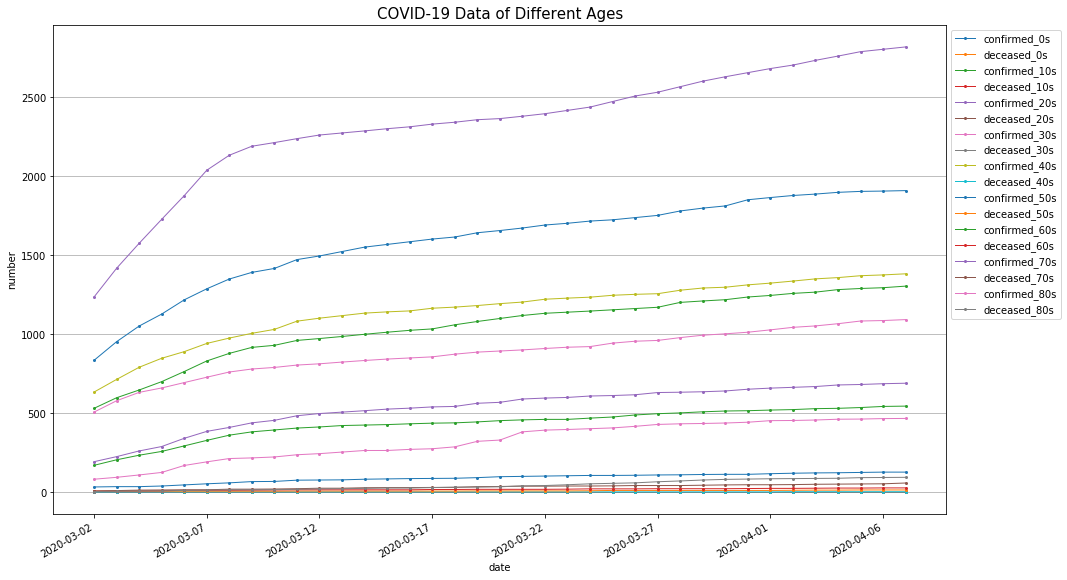

In [163]:
fig, ax = plt.subplots(figsize=(16,10))
result.plot(marker='o',ms=2,lw=1,ax=ax)
fig.autofmt_xdate()
plt.legend(bbox_to_anchor = [1,1])
plt.title('COVID-19 Data of Different Ages',size=15)
plt.ylabel('number')
plt.grid(axis='y')
plt.show()

3. Visualize the File TimeGender

In [164]:
TimeGender = pd.read_csv('TimeGender.csv')
TimeGender.head(5)

,date,time,sex,confirmed,deceased
0,2020-03-02,0,male,1591,13
1,2020-03-02,0,female,2621,9
2,2020-03-03,0,male,1810,16
3,2020-03-03,0,female,3002,12
4,2020-03-04,0,male,1996,20


In [165]:
#The processing is the same as the one above.
TimeGender.drop(['time'],axis=1,inplace=True)
male=TimeGender[TimeGender['sex']=='male']
male=male.rename(columns={'confirmed':'confirmed_male'})
male=male.rename(columns={'deceased':'deceased_male'})
female=TimeGender[TimeGender['sex']=='female']
female=female.rename(columns={'confirmed':'confirmed_female'})
female=female.rename(columns={'deceased':'deceased_female'})
result = pd.merge(female ,male, on='date')
result.set_index(['date'],inplace=True)
result.head(5)

,sex_x,confirmed_female,deceased_female,sex_y,confirmed_male,deceased_male
date,,,,,,
2020-03-02,female,2621,9,male,1591,13
2020-03-03,female,3002,12,male,1810,16
2020-03-04,female,3332,12,male,1996,20
2020-03-05,female,3617,14,male,2149,21
2020-03-06,female,3939,17,male,2345,25


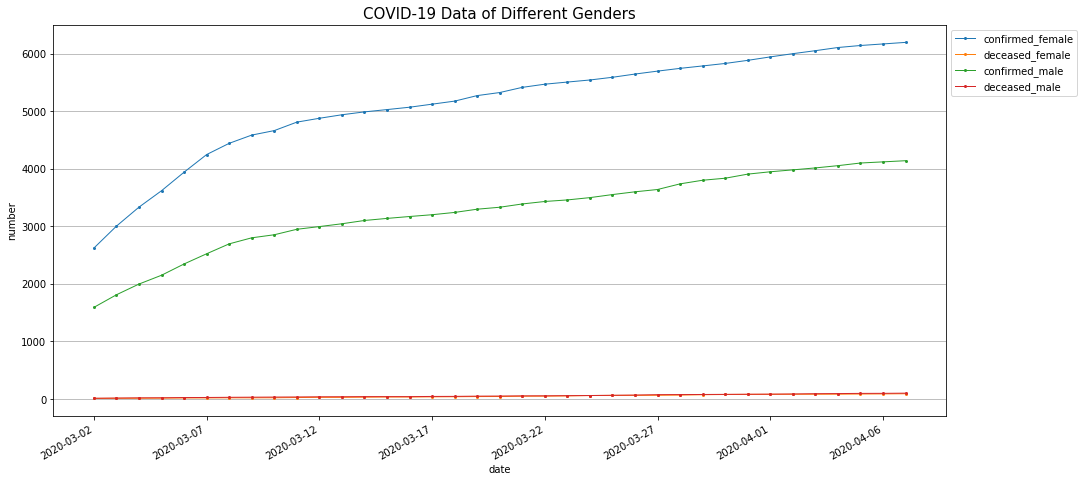

In [166]:
fig, ax = plt.subplots(figsize=(16,8))
result.plot(marker='o',ms=2,lw=1,ax=ax)
fig.autofmt_xdate()
plt.legend(bbox_to_anchor = [1,1])
plt.title('COVID-19 Data of Different Genders',size=15)
plt.ylabel('number')
plt.grid(axis='y')
plt.show()

4. Visualize the File TimeProvince

In [167]:
TimeProvince=pd.read_csv('TimeProvince.csv')
TimeProvince.head(5)

,date,time,province,confirmed,released,deceased
0,2020-01-20,16,Seoul,0,0,0
1,2020-01-20,16,Busan,0,0,0
2,2020-01-20,16,Daegu,0,0,0
3,2020-01-20,16,Incheon,1,0,0
4,2020-01-20,16,Gwangju,0,0,0


In [168]:
#It will be a mass if we draw the imformatin of all provinces, so we choose to draw the figure of the top 5 provinces with most patients.
TimeProvince.drop(['time'],axis=1,inplace=True)
p1=TimeProvince[TimeProvince['province']=='Gyeongsangbuk-do']
p1=p1.rename(columns={'confirmed':'confirmed_Gyeongsangbuk-do'})
p1=p1.rename(columns={'released':'released_Gyeongsangbuk-do'})
p1=p1.rename(columns={'deceased':'deceased_Gyeongsangbuk-do'})
p2=TimeProvince[TimeProvince['province']=='Gyeonggi-do']
p2=p2.rename(columns={'confirmed':'confirmed_Gyeonggi-do'})
p2=p2.rename(columns={'released':'released_Gyeonggi-do'})
p2=p2.rename(columns={'deceased':'deceased_Gyeonggi-do'})
p3=TimeProvince[TimeProvince['province']=='Seoul']
p3=p3.rename(columns={'confirmed':'confirmed_Seoul'})
p3=p3.rename(columns={'released':'released_Seoul'})
p3=p3.rename(columns={'deceased':'deceased_Seoul'})
p4=TimeProvince[TimeProvince['province']=='Chungcheongnam-do']
p4=p4.rename(columns={'confirmed':'confirmed_Chungcheongnam-do'})
p4=p4.rename(columns={'released':'released_Chungcheongnam-do'})
p4=p4.rename(columns={'deceased':'deceased_Chungcheongnam-do'})
p5=TimeProvince[TimeProvince['province']=='Busan']
p5=p5.rename(columns={'confirmed':'confirmed_Busan'})
p5=p5.rename(columns={'released':'released_Busan'})
p5=p5.rename(columns={'deceased':'deceased_Busan'})
result = pd.merge(p1,p2, on='date')
result = pd.merge(result,p3, on='date')
result = pd.merge(result,p4, on='date')
result = pd.merge(result,p5, on='date')
result.set_index(['date'],inplace=True)
result.head(5)

,province_x,confirmed_Gyeongsangbuk-do,released_Gyeongsangbuk-do,deceased_Gyeongsangbuk-do,province_y,confirmed_Gyeonggi-do,released_Gyeonggi-do,deceased_Gyeonggi-do,province_x,confirmed_Seoul,released_Seoul,deceased_Seoul,province_y,confirmed_Chungcheongnam-do,released_Chungcheongnam-do,deceased_Chungcheongnam-do,province,confirmed_Busan,released_Busan,deceased_Busan
date,,,,,,,,,,,,,,,,,,,,
2020-01-20,Gyeongsangbuk-do,0,0,0,Gyeonggi-do,0,0,0,Seoul,0,0,0,Chungcheongnam-do,0,0,0,Busan,0,0,0
2020-01-21,Gyeongsangbuk-do,0,0,0,Gyeonggi-do,0,0,0,Seoul,0,0,0,Chungcheongnam-do,0,0,0,Busan,0,0,0
2020-01-22,Gyeongsangbuk-do,0,0,0,Gyeonggi-do,0,0,0,Seoul,0,0,0,Chungcheongnam-do,0,0,0,Busan,0,0,0
2020-01-23,Gyeongsangbuk-do,0,0,0,Gyeonggi-do,0,0,0,Seoul,0,0,0,Chungcheongnam-do,0,0,0,Busan,0,0,0
2020-01-24,Gyeongsangbuk-do,0,0,0,Gyeonggi-do,1,0,0,Seoul,0,0,0,Chungcheongnam-do,0,0,0,Busan,0,0,0


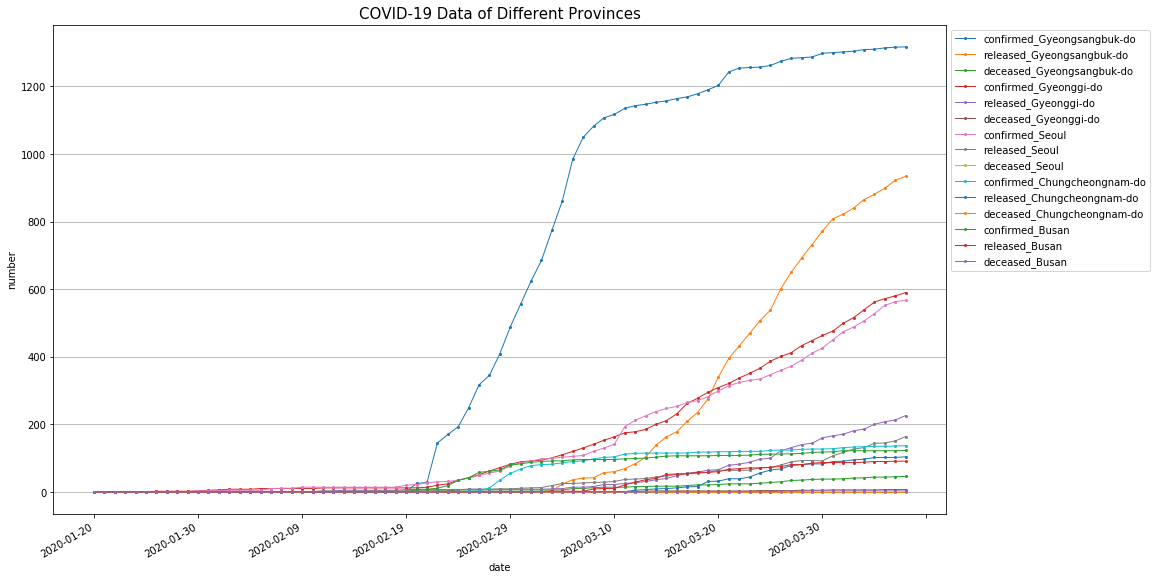

In [169]:
fig, ax = plt.subplots(figsize=(16,10))
result.plot(marker='o',ms=2,lw=1,ax=ax)
fig.autofmt_xdate()
plt.legend(bbox_to_anchor = [1,1])
plt.title('COVID-19 Data of Different Provinces',size=15)
plt.ylabel('number')
plt.grid(axis='y')
plt.show()

**Conclusion:**

Through these time series figures, I find that from February 22, 2020, South Korea began to increase the number of daily tests, and the number of newly diagnosed people in South Korea also increased rapidly. The most newly confirmed patients are in the age group 20s and 50s. There are more newly diagnosed female patients than male patients.A large number of newly confirmed cases came from the province of Gyeongsangbuk-do, and the number of newly confirmed diagnoses in other provinces gradually increased a few days later.

### 2.2 Prediction of the Recovery Time of the Patients
#### 2.2.1 Data Preprocessing 

In [11]:
#count miss value of each column
index_array = np.sum(PatientInfo.isnull() == True, axis=0)
print(index_array)
print(PatientInfo.shape[0])

patient_id               0
global_num            1160
sex                     94
birth_year             464
age                    105
country                 90
province                 0
city                    76
disease               3110
infection_case         819
infection_order       3097
infected_by           2393
contact_number        2539
symptom_onset_date    2682
confirmed_date           0
released_date         2147
deceased_date         3072
state                    0
dtype: int64
3128


I want to build a regression model to predict of the recovery time of the patients.

Firstly I do data preprocessing to the data. 
It is easy to define the ‘recovery time’ as the difference between ‘released_date’ and ‘confirmed_date’.
For the ‘deceased’patients,I choose to simply delete it in this task and I will find the rows that released_date is not null
and calculte the recovery time and join the table with the table Region to get more information.

Finally I will delete some useless column and do some data coding and discretization and normalization.

In [12]:
data_released = PatientInfo[PatientInfo['released_date'].notnull()]
data_released=data_released[data_released['state']=='released']
data_released['recover_days']=(pd.to_datetime(data_released['released_date'])-pd.to_datetime(data_released['confirmed_date'])).dt.days
Region=pd.read_csv('Region.csv')
result = pd.merge(data_released,Region, on=['city','province'])
#count miss value of each column of the new table
index_array = np.sum(result.isnull() == True, axis=0)
print(index_array)

patient_id                    0
global_num                  357
sex                           0
birth_year                  130
age                           2
country                       0
province                      0
city                          0
disease                     952
infection_case              451
infection_order             926
infected_by                 759
contact_number              724
symptom_onset_date          857
confirmed_date                0
released_date                 0
deceased_date               952
state                         0
recover_days                  0
code                          0
latitude                      0
longitude                     0
elementary_school_count       0
kindergarten_count            0
university_count              0
academy_ratio                 0
elderly_population_ratio      0
elderly_alone_ratio           0
nursing_home_count            0
dtype: int64


We notice that some columns with too much miss value should be ignored. Since birth_year is more accurate than age, we choose to fill the miss value in age and then use age to fill birth_year with media value i.e. 20s will be considered as 25 years old and then 
we use 2020-25 to calculate his birth_year.

In [13]:
age=result['age'].value_counts()
age= age.sort_values(ascending=False)[:10]
age

20s    251
50s    195
40s    165
30s    119
60s     95
10s     43
70s     39
80s     21
0s      13
90s      9
Name: age, dtype: int64

In [14]:
#fill the miss value of the column age with mode '20s'
result['age'] = result['age'].fillna('20s')
result['age_int']=result['age'].apply(lambda x: (int)(x[0:1]))
result['birth_year']=result['birth_year'].fillna(2020-5-result['age_int']*10)
index_array = np.sum(result.isnull() == True, axis=0)
print(index_array)

patient_id                    0
global_num                  357
sex                           0
birth_year                    0
age                           0
country                       0
province                      0
city                          0
disease                     952
infection_case              451
infection_order             926
infected_by                 759
contact_number              724
symptom_onset_date          857
confirmed_date                0
released_date                 0
deceased_date               952
state                         0
recover_days                  0
code                          0
latitude                      0
longitude                     0
elementary_school_count       0
kindergarten_count            0
university_count              0
academy_ratio                 0
elderly_population_ratio      0
elderly_alone_ratio           0
nursing_home_count            0
age_int                       0
dtype: int64


I find that there is no miss value in the columns that will be used later. Then I will normalize the data and encode the column sex.

In [15]:
col=['birth_year','elementary_school_count','kindergarten_count','university_count','academy_ratio','elderly_population_ratio',
    'latitude','longitude','elderly_alone_ratio','nursing_home_count','age_int']
temp=result[col]
#using min-max normalization
data_pca=temp
temp = (temp-temp.min())/(temp.max()-temp.min())
Map={'male':0,'female':1}
temp['sex']=result['sex']
temp['sex'] = temp['sex'].map(Map)
temp['recover_days']=result['recover_days']
temp['birth_year']=temp['birth_year']
temp.head(5)

,birth_year,elementary_school_count,kindergarten_count,university_count,academy_ratio,elderly_population_ratio,latitude,longitude,elderly_alone_ratio,nursing_home_count,age_int,sex,recover_days
0,0.410526,0.293578,0.268421,0.1,0.212042,0.243018,0.860991,0.134585,0.143713,0.339691,0.555556,0,13
1,0.452632,0.293578,0.268421,0.1,0.212042,0.243018,0.860991,0.134585,0.143713,0.339691,0.555556,0,10
2,0.652632,0.174312,0.136842,0.1,0.089005,0.324991,0.872790,0.216556,0.215569,0.211115,0.333333,0,32
3,0.410526,0.082569,0.063158,0.3,0.353403,0.383750,0.865619,0.178304,0.209581,0.204209,0.555556,0,20
4,0.431579,0.082569,0.063158,0.3,0.353403,0.383750,0.865619,0.178304,0.209581,0.204209,0.555556,1,19


#### 2.2.2 Data Prediction
It is well known that how long a confirmed patient will recover mainly depends on his physical health condition and whether he has other underlying diseases. We do not have any data on the health indicators of patients, so it is very hard to build an accurate model.

I will compare some models to see how they work on this dataset.

Firstly I will divide the samples into training set and test set and the test set accounted for 30%.

In [36]:
y = temp['recover_days']
X = temp.copy().drop(['recover_days'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,random_state=33)

In [37]:
#1.LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
predicted = lr.predict(X_test)
print('R_square_value: ')
print(round(r2_score(y_test, predicted),3))
print( 'MSE_value: ')
print(round(mean_squared_error(y_test, predicted),3))

R_square_value: 
0.077
MSE_value: 
52.682


In [177]:
#2.RidgeRegression
model = RidgeCV(alphas=[0.5,0.6,0.7,0.8,0.9,0.4,0.3,0.1,0.2,1])
model.fit(X_train,y_train)
predicted = model.predict(X_test)
print('R_square_value: ')
print(round(r2_score(y_test, predicted),4))
print( 'MSE_value: ')
print(round(mean_squared_error(y_test, predicted),4))

R_square_value: 
0.0785
MSE_value: 
52.6262


In [178]:
#3.LassoRegression
model = LassoLarsCV()  # LassoLarsCV自动调节alpha可以实现选择最佳的alpha
model.fit(X_train,y_train) 
predicted = model.predict(X_test)
print('R_square_value: ')
print(round(r2_score(y_test, predicted),4))
print( 'MSE_value: ')
print(round(mean_squared_error(y_test, predicted),4))

R_square_value: 
0.0804
MSE_value: 
52.5148


In [179]:
#4.Assembled model: GradientBoostingRegressor
gbr=GradientBoostingRegressor()
gbr.fit(X_train,y_train)
predicted=gbr.predict(X_test)
print('R_square_value: ')
print(round(r2_score(y_test, predicted),4))
print( 'MSE_value: ')
print(round(mean_squared_error(y_test, predicted),4))

R_square_value: 
0.055
MSE_value: 
53.9639


**Conclusion:**

I find that no model is accurate because the most important information i.e. physical health condition and whether he has other underlying diseases is unknown.

Comparing the four models, I find that the Assembled model did worst because it may be overfitting in this dataset.

In the other three models, LassoRegression did best because it uses LASSO Regression with L1 form which has a very good variable selection effect.

RidgeRegression uses Ridge Regression with L2 form which has a good variable selection effect so it did better than LinearRegression
but it did worse than LassoRegression.

The LinearRegression did worst in the three models without assembling because it did not use Regression to solve multicollinearity.

#### 2.2.3 Feature Selection and Model Selection

We know that not all features in the dataset will affect the recover time of a patient and some columns may have multicollinearity
and some columns maybe unrelated to the recover time.

A method to choose feature is using iteration and the greedy algorithm. In other words, we choose subset of the features and build
a model on the training set and then test the model on the test set. If the model works better than the prvious one, we keep the 
selection, otherwise we reselect features and build models aga until the model will not be impoved by selecting features.

However, greedy algorithm can find a better model but the result may be not a global optimum solution because it may be 
stuck in a local optimum solution.

The followings are the new model I built after variable selection.

In [180]:
# Divide the samples into training set and test set. 
col1=['elementary_school_count','elderly_population_ratio',
    'latitude','elderly_alone_ratio','nursing_home_count','age_int','recover_days']
temp1=result[col1]
y = temp1['recover_days']
X = temp1.drop(['recover_days'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,random_state=33)

In [181]:
#1.LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
predicted = lr.predict(X_test)
print('R_square_value: ')
print(round(r2_score(y_test, predicted),3))
print( 'MSE_value: ')
print(round(mean_squared_error(y_test, predicted),3))

R_square_value: 
0.09
MSE_value: 
51.953


In [182]:
#2.RidgeRegression
model = RidgeCV(alphas=[0.5,0.6,0.7,0.8,0.9,0.4,0.3,0.1,0.2,1])
model.fit(X_train,y_train)
predicted = model.predict(X_test)
print('R_square_value: ')
print(round(r2_score(y_test, predicted),4))
print( 'MSE_value: ')
print(round(mean_squared_error(y_test, predicted),4))

R_square_value: 
0.0902
MSE_value: 
51.9557


In [183]:
#3.LassoRegression
model = LassoLarsCV()  # LassoLarsCV自动调节alpha可以实现选择最佳的alpha
model.fit(X_train,y_train) 
predicted = model.predict(X_test)
print('R_square_value: ')
print(round(r2_score(y_test, predicted),4))
print( 'MSE_value: ')
print(round(mean_squared_error(y_test, predicted),4))

R_square_value: 
0.0903
MSE_value: 
51.9525


In [33]:
#Assembled model: GradientBoostingRegressor
col2=['elementary_school_count',
    'latitude','elderly_alone_ratio','age_int','recover_days']
temp2=result[col2]
y = temp2['recover_days']
X = temp2.drop(['recover_days'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,random_state=33)
gbr=GradientBoostingRegressor()
gbr.fit(X_train,y_train)
predicted=gbr.predict(X_test)
print('R_square_value: ')
print(round(r2_score(y_test, predicted),4))
print( 'MSE_value: ')
print(round(mean_squared_error(y_test, predicted),4))

R_square_value: 
0.1109
MSE_value: 
50.7721


**Conclusion:**

By using feature selection, It is obvious that the R_square_value of the four models all increase and the MSE_value of the four models
all decrease which means the four models are all improved.

The best model is the Assembled model: GradientBoostingRegressor because its R_square_value is maximal and its MSE_value is minimal.
However, the assembled model has poor interpretability.

#### 2.2.4 Using PCA to Do Data Preprocessing 

In [16]:
data_pca

,birth_year,elementary_school_count,kindergarten_count,university_count,academy_ratio,elderly_population_ratio,latitude,longitude,elderly_alone_ratio,nursing_home_count,age_int
0,1964.0,36,56,1,1.17,14.39,37.551166,126.849506,5.7,1080,5
1,1968.0,36,56,1,1.17,14.39,37.551166,126.849506,5.7,1080,5
2,1987.0,23,31,1,0.70,16.65,37.606832,127.092656,6.9,689,3
3,1964.0,13,17,3,1.71,18.27,37.572999,126.979189,6.8,668,5
4,1966.0,13,17,3,1.71,18.27,37.572999,126.979189,6.8,668,5
...,...,...,...,...,...,...,...,...,...,...,...
947,1969.0,17,16,2,1.25,27.01,35.686526,127.910021,17.4,127,5
948,1963.0,17,16,2,1.25,27.01,35.686526,127.910021,17.4,127,5
949,1998.0,113,123,4,1.53,15.10,33.488936,126.500423,6.4,1245,2
950,1998.0,113,123,4,1.53,15.10,33.488936,126.500423,6.4,1245,2


In [31]:
#The dimension of the final data is 3
pca=PCA(n_components=3)
X_pca=pca.fit_transform(data_pca)
df = pd.DataFrame(X_pca)
df = (df-df.min())/(df.max()-df.min())
df

,0,1,2
0,0.340437,0.439450,0.577860
1,0.340445,0.437860,0.536146
2,0.211365,0.436380,0.309048
3,0.204034,0.502386,0.531499
4,0.204038,0.501591,0.510642
...,...,...,...
947,0.026261,0.365837,0.490679
948,0.026249,0.368222,0.553250
949,0.396894,0.121135,0.330485
950,0.396894,0.121135,0.330485


In [32]:
y = temp['recover_days']
X = df
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,random_state=33)

In [33]:
#1.LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
predicted = lr.predict(X_test)
print('R_square_value: ')
print(round(r2_score(y_test, predicted),3))
print( 'MSE_value: ')
print(round(mean_squared_error(y_test, predicted),3))

R_square_value: 
0.051
MSE_value: 
54.216


In [34]:
#2.Assembled model: GradientBoostingRegressor
gbr=GradientBoostingRegressor()
gbr.fit(X_train,y_train)
predicted=gbr.predict(X_test)
print('R_square_value: ')
print(round(r2_score(y_test, predicted),4))
print( 'MSE_value: ')
print(round(mean_squared_error(y_test, predicted),4))

R_square_value: 
0.0117
MSE_value: 
56.4408


**Conclusion:**

After using PCA to Do  Do Data Preprocessing, we did not get a better model as we have expected. The result is much worse than the result of using the Greedy Algorithm to do the Feature Selection.

I guess the reason is that maybe the dataset is not suitable for the method PCA to do data preprocessing.


### 2.4 Clustering of Risk Levels of the Cities

In [13]:
t=result['city'].value_counts()
df=t.to_frame()
df = df.reset_index()
df=df.rename(columns={'city':'cnt'})
df=df.rename(columns={'index':'city'})
df.head(5)

,city,cnt
0,Gyeongsan-si,439
1,Cheonan-si,89
2,Gumi-si,49
3,Chilgok-gun,35
4,Yeongcheon-si,22


In [14]:
t = pd.merge(df,Region, on='city')
t.head(5)

,city,cnt,code,province,latitude,longitude,elementary_school_count,kindergarten_count,university_count,academy_ratio,elderly_population_ratio,elderly_alone_ratio,nursing_home_count
0,Gyeongsan-si,439,60010,Gyeongsangbuk-do,35.825056,128.741544,31,61,10,1.34,16.18,7.0,427
1,Cheonan-si,89,41120,Chungcheongnam-do,36.814980,127.113868,75,112,6,1.91,10.42,4.5,1069
2,Gumi-si,49,60040,Gyeongsangbuk-do,36.119641,128.344295,50,104,3,1.96,9.08,4.3,616
3,Chilgok-gun,35,60220,Gyeongsangbuk-do,35.995529,128.401735,21,32,2,1.48,15.17,6.7,151
4,Yeongcheon-si,22,60150,Gyeongsangbuk-do,35.973268,128.938603,18,23,1,0.83,27.32,15.3,192


In [32]:
col=['cnt','latitude','longitude','elementary_school_count','kindergarten_count','university_count','academy_ratio'
     ,'elderly_population_ratio','elderly_alone_ratio','nursing_home_count','city']
a=t[col]
a.set_index(['city'],inplace=True)
#min-max normalization
a = (a-a.min())/(a.max()-a.min())
b=a
a.head(5)

,cnt,latitude,longitude,elementary_school_count,kindergarten_count,university_count,academy_ratio,elderly_population_ratio,elderly_alone_ratio,nursing_home_count
city,,,,,,,,,,
Gyeongsan-si,1.000000,0.495141,0.772432,0.247706,0.298429,1.0,0.256545,0.307943,0.221557,0.124959
Cheonan-si,0.200913,0.704956,0.223707,0.651376,0.565445,0.6,0.405759,0.099021,0.071856,0.336074
Gumi-si,0.109589,0.557579,0.638511,0.422018,0.523560,0.3,0.418848,0.050417,0.059880,0.187110
Chilgok-gun,0.077626,0.531273,0.657875,0.155963,0.146597,0.2,0.293194,0.271309,0.203593,0.034199
Yeongcheon-si,0.047945,0.526555,0.838865,0.128440,0.099476,0.1,0.123037,0.712006,0.718563,0.047682


In [33]:
# generate the linkage matrix
Z = linkage(a, 'complete', 'minkowski')

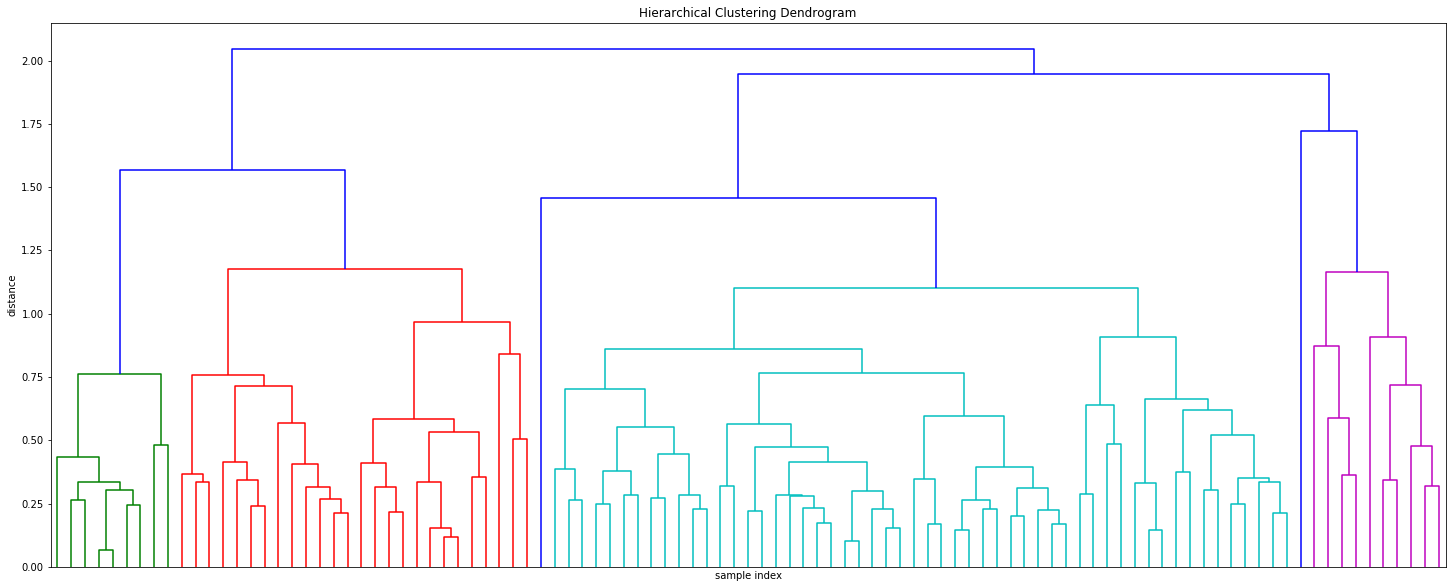

In [34]:
# calculate full dendrogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    no_labels = True
)
plt.show()

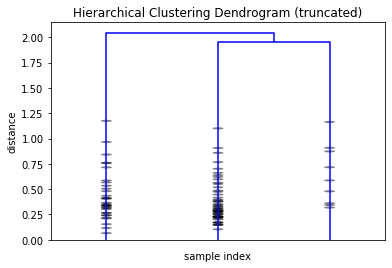

In [35]:
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=3,  # show only the last p merged clusters
    show_leaf_counts=False,  # otherwise numbers in brackets are counts
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.show()

In [36]:
#We use the MDS method to reduce the dimension of the distance matrix, and use different colors to represent the clustering results. 
seed = np.random.RandomState(seed=3)
mds = manifold.MDS(n_components=2, max_iter=3000, eps=1e-9, random_state=seed,
                n_jobs=1)
pos = mds.fit(a).embedding_

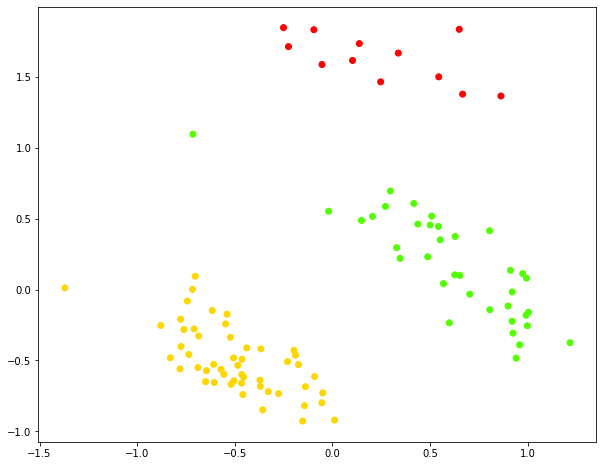

In [135]:
k=3
clusters = fcluster(Z, k, criterion='maxclust')
plt.figure(figsize=(10, 8))
plt.scatter(pos[:,0], pos[:,1], c=clusters, cmap='prism')  # plot points with cluster dependent colors
plt.show()

In [140]:
b=b.copy()
b['cluster'] = clusters
b.groupby('cluster').mean()

,cnt,latitude,longitude,elementary_school_count,kindergarten_count,university_count,academy_ratio,elderly_population_ratio,elderly_alone_ratio,nursing_home_count
cluster,,,,,,,,,,
1,16.166667,36.474173,127.457965,76.000000,135.166667,4.916667,1.912500,12.203333,5.425000,1249.666667
2,4.098039,37.150067,127.067092,29.098039,43.843137,1.980392,1.483922,15.057255,6.333333,664.137255
3,18.694444,35.938680,128.591659,20.750000,29.250000,1.250000,1.388611,21.550556,11.011111,279.305556


**Conclusion:**

We use the MDS method to reduce the dimension of the distance matrix, and use different colors to represent the clustering results.
The figure above shows that the results is good.

The cities are divided into three different risk levels: high, middle, or low.

In the high risk level cities(cluster 3), the number of confirmed patients, the elderly_alone_ratio and the elderly_population_ratio
is the largest but the nursing_home_count and the academy_ratio is the smallest. It is very reasonable to classify the places with high number of diagnosed patients, serious aging, small number of nursing homes and people with low education level as high-risk areas.

In the mid risk level cities(cluster 1), although the number of confirmed patients is large, the nursing_home_count and
the academy_ratio are maximal and the elderly_population_ratio and the elderly_alone_ratio is minimal which means there are
more medical resources for every patient.

In the low risk level cities(cluster 2), the number of confirmed patients is fewest and the academy_ratio, elderly_population_ratio,
elderly_alone_ratio and nursing_home_count are all middle valuse.

If I were the policy maker, I would distribute more medical resources to cities with high level of risk, and send medical teams to assist high-risk cities.

## 3. Conclusion:

By analyzing these data of South Korea, I found COVID-19 is highly transmitted and people of all ages are easily infected. The main transmission route is contact transmission, so reducing aggregation and paying attention to wearing masks are good protective measures. At the same time, we should assist medical resources and send medical teams to high-risk areas to help them fight the epidemic together and overcome difficulties.